## Example Bulk Si sp3s
### Symmetry adapted linear combinations
This example is essentially the same as the example of bulk silicon sp3 but include one additional orbitals, the higher 3s orbital, which is often included in the tight-binding parameterization of Si. 

Compare to the previous example ($3\times A_1$, $E (2-fold)$, $T_1 (3-fold)$, $4 \times T_2 (3-fold)$), the 4 additional $3s$ orbital form $2\times A_1$ and $T_2$. 

In [1]:
from automaticTB.examples import get_cif_filename_for
from automaticTB.solve import (
    get_structure_from_cif_file, get_EquationSystem_from_Structure
)

import numpy as np

bulksi = get_structure_from_cif_file(
    get_cif_filename_for("Si"), {"Si":"3s3p4s"}
)

combined_equation = get_EquationSystem_from_Structure(bulksi, find_additional_symmetry=False)

free_ao = combined_equation.free_AOpairs
for i, free in enumerate(free_ao):
    print(f"{i+1:>2d}" + str(free))


 1 > Pair: Si-00      3s -> Si-00      3s r = (  0.00,  0.00,  0.00)
 2 > Pair: Si-00      3s -> Si-01      4s r = ( -1.36, -1.36, -1.36)
 3 > Pair: Si-00      4s -> Si-01      3s r = ( -1.36, -1.36, -1.36)
 4 > Pair: Si-00     3px -> Si-00     3px r = (  0.00,  0.00,  0.00)
 5 > Pair: Si-00      4s -> Si-00      4s r = (  0.00,  0.00,  0.00)
 6 > Pair: Si-00     3px -> Si-01      3s r = ( -1.36, -1.36, -1.36)
 7 > Pair: Si-00      4s -> Si-01     3px r = ( -1.36, -1.36, -1.36)
 8 > Pair: Si-00     3px -> Si-01     3pz r = ( -1.36, -1.36, -1.36)
 9 > Pair: Si-00      3s -> Si-01      3s r = ( -1.36, -1.36, -1.36)
10 > Pair: Si-00     3px -> Si-01     3px r = ( -1.36, -1.36, -1.36)
11 > Pair: Si-00      4s -> Si-01      4s r = ( -1.36, -1.36, -1.36)
12 > Pair: Si-00     3px -> Si-01      4s r = ( -1.36, -1.36, -1.36)
13 > Pair: Si-00      3s -> Si-01     3px r = ( -1.36, -1.36, -1.36)


In [2]:
# prepare bandstructure plot
from automaticTB.properties import UnitCell

cell = UnitCell(bulksi.cell)
path = cell.get_bandline(
    ["L   0.5   0.5  0.5  G  0.0   0.0  0.0",
     "G   0.0   0.0  0.0  X  0.5   0.0  0.5",
     "X   0.5   0.0  0.5  U  0.625 0.25 0.625",
     "K 0.375 0.375 0.75  G  0.0   0.0  0.0"]
)

### Free values of interaction
There we call the function that will give us the global independent parameter
```python
get_combined_equation_from_structure
```
from its result, we can obtain all the free independent interaction parameter in the structure. After these interaction are determined, we can supply values to these parameters. Here the values are taken from the paper of Klimeck et al. 2000 (NN VB) model. Notice that when suppling the value, we should notice the difference between the transition. In Klimeck's paper, the states on the right are positioned at (a/2, a/2, a/2) but here the state on the right are positioned at (a/2, -a/2, -a/2). It is also important to notice that the definition of the parameter in the paper is V = 4 Hij. For example: $V(s,s) = 4\langle saR | H | scR \rangle$. Therefore, it is necessary to divide by 4 for the interaction parameter.

Finally, we plot the band structure. it can be seem that the valence band agree in general very well with the Si band structure, while the conduction band deviate slight more. Dispersion along K-G is also problematic along the conduction band, so is the energy at K point for the valence band.

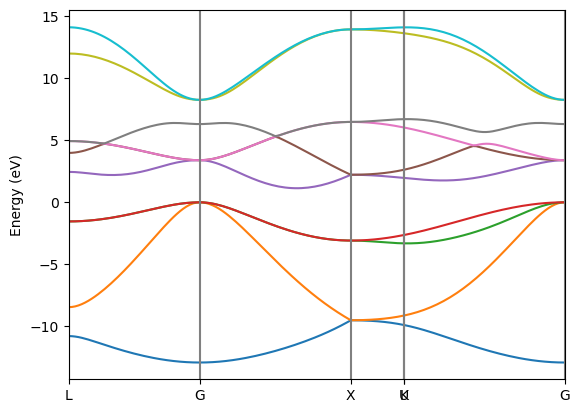

In [3]:
from automaticTB.properties import (
    get_tbModel_from_structure_interactions_overlaps
)
from automaticTB.properties import BandStructureResult

interaction_values = np.array([ 
    -3.3179,    # 1 > Pair: Si-00      3s -> Si-00      3s r = (  0.00,  0.00,  0.00)
    0.0,    # 2 > Pair: Si-00      3s -> Si-01      4s r = ( -1.36, -1.36, -1.36)
    0.0,    # 3 > Pair: Si-00      4s -> Si-01      3s r = ( -1.36, -1.36, -1.36)
    1.67862,    # 4 > Pair: Si-00     3px -> Si-00     3px r = (  0.00,  0.00,  0.00)
    8.23164,    # 5 > Pair: Si-00      4s -> Si-00      4s r = (  0.00,  0.00,  0.00)
    7.1423/4,    # 6 > Pair: Si-00     3px -> Si-01      3s r = ( -1.36, -1.36, -1.36)
    -7.2505/4,    # 7 > Pair: Si-00      4s -> Si-01     3px r = ( -1.36, -1.36, -1.36)
    4.7757/4,    # 8 > Pair: Si-00     3px -> Si-01     3pz r = ( -1.36, -1.36, -1.36)
    -9.5990/4,    # 9 > Pair: Si-00      3s -> Si-01      3s r = ( -1.36, -1.36, -1.36)
    1.6955/4,    #10 > Pair: Si-00     3px -> Si-01     3px r = ( -1.36, -1.36, -1.36)
    0.0,    #11 > Pair: Si-00      4s -> Si-01      4s r = ( -1.36, -1.36, -1.36)
    7.2505/4,    #12 > Pair: Si-00     3px -> Si-01      4s r = ( -1.36, -1.36, -1.36)
    -7.1423/4,    #13 > Pair: Si-00      3s -> Si-01     3px r = ( -1.36, -1.36, -1.36)
])
# the divide by 4 is necessary because of the definition of V term, see P. Vogl et al. 1983 page 4, around equation 7)

interaction_pairs = combined_equation.solve_interactions_to_InteractionPairs(interaction_values)
model = get_tbModel_from_structure_interactions_overlaps(bulksi, interaction_pairs)

# reference for DFT calculated band structure: 
# http://lampx.tugraz.at/~hadley/ss1/semiconductors/silicon_bandstructure.php
bandresult = BandStructureResult.from_tightbinding_and_kpath(model, path)
tmp_filename = "Si_NN_VB.pdf"
bandresult.plot_data(tmp_filename)

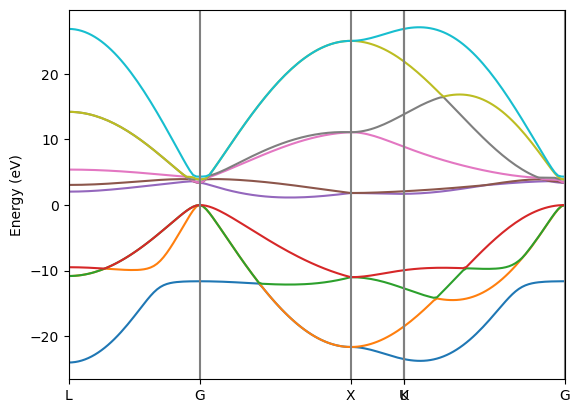

In [4]:
# now we use the values that is fitted to the conduction band
interaction_values = np.array([ 
    -3.6586,    # 1 > Pair: Si-00      3s -> Si-00      3s r = (  0.00,  0.00,  0.00)
    0.0,    # 2 > Pair: Si-00      3s -> Si-01      4s r = ( -1.36, -1.36, -1.36)
    0.0,    # 3 > Pair: Si-00      4s -> Si-01      3s r = ( -1.36, -1.36, -1.36)
    1.67889,    # 4 > Pair: Si-00     3px -> Si-00     3px r = (  0.00,  0.00,  0.00)
    3.87567,    # 5 > Pair: Si-00      4s -> Si-00      4s r = (  0.00,  0.00,  0.00)
    8.8747/4,    # 6 > Pair: Si-00     3px -> Si-01      3s r = ( -1.36, -1.36, -1.36)
    -5.4117/4,    # 7 > Pair: Si-00      4s -> Si-01     3px r = ( -1.36, -1.36, -1.36)
    23.324/4,    # 8 > Pair: Si-00     3px -> Si-01     3pz r = ( -1.36, -1.36, -1.36)
    -7.9714/4,    # 9 > Pair: Si-00      3s -> Si-01      3s r = ( -1.36, -1.36, -1.36)
    1.6955/4,    #10 > Pair: Si-00     3px -> Si-01     3px r = ( -1.36, -1.36, -1.36)
    0.0,    #11 > Pair: Si-00      4s -> Si-01      4s r = ( -1.36, -1.36, -1.36)
    5.4117/4,    #12 > Pair: Si-00     3px -> Si-01      4s r = ( -1.36, -1.36, -1.36)
    -8.8747/4,    #13 > Pair: Si-00      3s -> Si-01     3px r = ( -1.36, -1.36, -1.36)
])
# the divide by 4 is necessary because of the definition of V term, see P. Vogl et al. 1983 page 4, around equation 7)

interaction_pairs = combined_equation.solve_interactions_to_InteractionPairs(interaction_values)
model = get_tbModel_from_structure_interactions_overlaps(bulksi, interaction_pairs)

# reference for DFT calculated band structure: 
# http://lampx.tugraz.at/~hadley/ss1/semiconductors/silicon_bandstructure.php
bandresult = BandStructureResult.from_tightbinding_and_kpath(model, path)
tmp_filename = "Si_NN_CB.pdf"
bandresult.plot_data(tmp_filename)